Imports

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('../data/Walmart_Sales.csv')

In [18]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Preprocess dataframe

In [33]:
df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df = df.sort_values('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6435 non-null   int64         
 1   date          6435 non-null   datetime64[ns]
 2   weekly_sales  6435 non-null   float64       
 3   holiday_flag  6435 non-null   int64         
 4   temperature   6435 non-null   float64       
 5   fuel_price    6435 non-null   float64       
 6   cpi           6435 non-null   float64       
 7   unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [20]:
df.isna().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [30]:
df.shape
df.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Visualize the weekly sales for each store

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


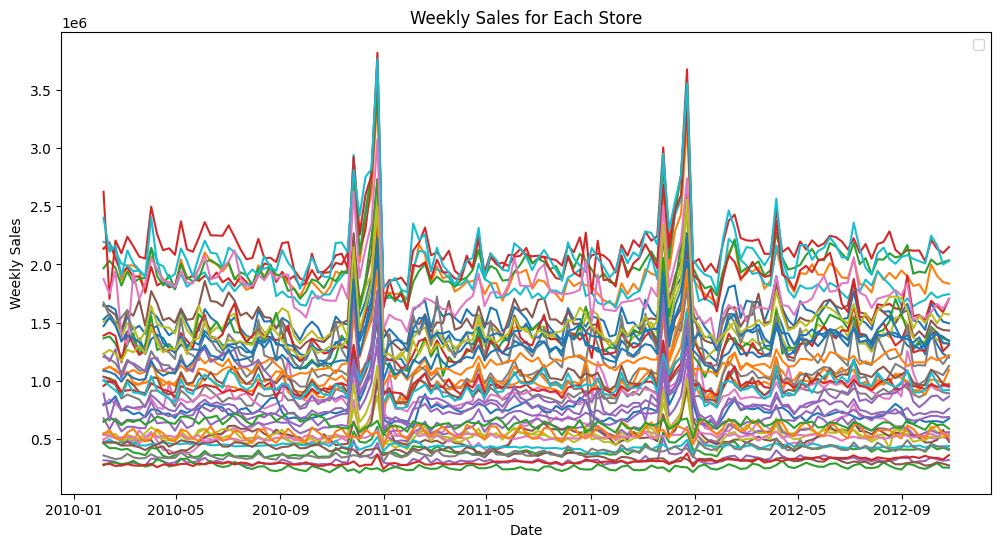

In [36]:
plt.figure(figsize=(12, 6))
for store in df['store'].unique():
    store_date = df[df['store'] == store]
    plt.plot(store_date['date'], store_date['weekly_sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for Each Store')
plt.legend()
plt.show()



It seems that there is seasonality within the data as we see small bumps and we also see what seems to be 2 change poitns in the data where the sales for each store spike.

We will group all data and sum up all store sales into 1 value as it seems as if all stores follow the same seasonal trend (sales go up and down at the same time)

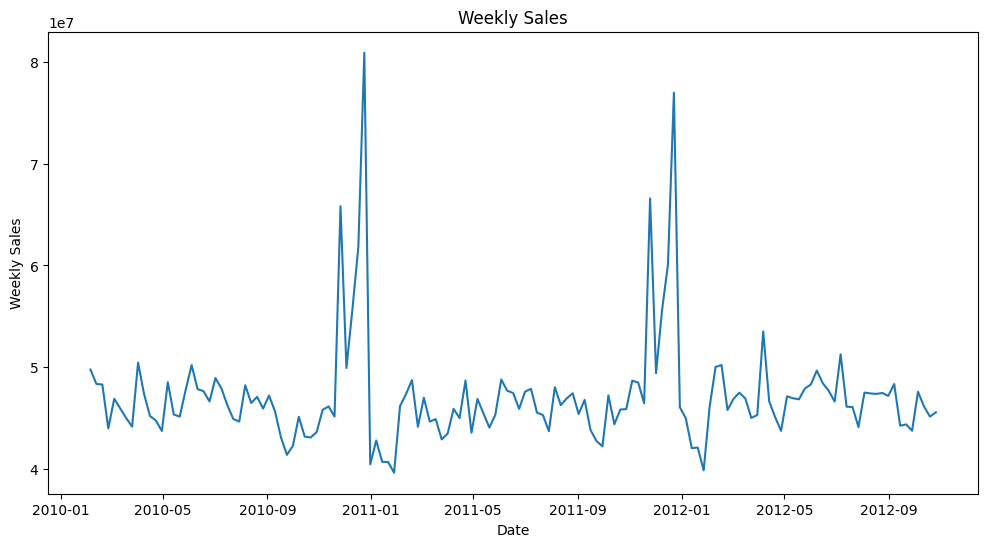

In [37]:
weekly_total = df.groupby('date')['weekly_sales'].sum().reset_index()
week_total = weekly_total.sort_values('date')
plt.figure(figsize=(12, 6))
plt.plot(week_total['date'], week_total['weekly_sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales')
plt.show()